<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Decision Tree Classification Model</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [59]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

plt.style.use('seaborn-darkgrid')
pd.set_option('Display.max_rows', None)

In [77]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [83]:
le = preprocessing.LabelEncoder()

df.Undergrad = le.fit_transform(df.Undergrad)
df['Marital.Status'] = le.fit_transform(df['Marital.Status'])
df.Urban = le.fit_transform(df.Urban)

In [62]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


### we see a problem undergrad, marital status and urban are categorical variables

In [84]:
df.Undergrad = df.Undergrad.astype('category')
df.Urban = df.Urban.astype('category')
df['Marital.Status'] = df['Marital.Status'].astype('category')

In [85]:
df.describe(include = 'all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
count,600.0,600.0,600.000000,600.000000,600.000000,600.0,600
unique,2.0,3.0,NaN,NaN,NaN,2.0,2
top,1.0,2.0,NaN,NaN,NaN,1.0,Safe
freq,312.0,217.0,NaN,NaN,NaN,302.0,476
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN,NaN


In [78]:
#adding new column as status
df['status'] = ''

In [86]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Safe
1,1,0,33700,134075,18,1,Safe
2,0,1,36925,160205,30,1,Safe
3,1,2,50190,193264,15,1,Safe
4,0,1,81002,27533,28,0,Safe


### labeling each individual

In [82]:
df.loc[df['Taxable.Income']<=30000,'status']='Risky'
df.loc[df['Taxable.Income']>30000,'status']='Safe'

In [89]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Safe
1,1,0,33700,134075,18,1,Safe
2,0,1,36925,160205,30,1,Safe
3,1,2,50190,193264,15,1,Safe
4,0,1,81002,27533,28,0,Safe
5,0,0,33329,116382,0,0,Safe
6,0,0,83357,80890,8,1,Safe
7,1,2,62774,131253,3,1,Safe
8,0,2,83519,102481,12,1,Safe
9,1,0,98152,155482,4,1,Safe


### Model building

In [102]:
X = df.iloc[:, [0,1,3,4,5]]
Y = df.iloc[:,-1]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 2)

In [103]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(370.6521739130435, 679.5, 'X[2] <= 191506.5\nentropy = 0.731\nsamples = 420\nvalue = [86, 334]'),
 Text(185.32608695652175, 528.5, 'X[3] <= 6.5\nentropy = 0.712\nsamples = 395\nvalue = [77, 318]'),
 Text(67.3913043478261, 377.5, 'X[2] <= 75993.0\nentropy = 0.513\nsamples = 70\nvalue = [8, 62]'),
 Text(33.69565217391305, 226.5, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(101.08695652173914, 226.5, 'X[2] <= 76515.5\nentropy = 0.605\nsamples = 54\nvalue = [8, 46]'),
 Text(67.3913043478261, 75.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(134.7826086956522, 75.5, 'entropy = 0.563\nsamples = 53\nvalue = [7, 46]'),
 Text(303.26086956521743, 377.5, 'X[2] <= 177179.5\nentropy = 0.746\nsamples = 325\nvalue = [69, 256]'),
 Text(235.8695652173913, 226.5, 'X[2] <= 176616.0\nentropy = 0.768\nsamples = 303\nvalue = [68, 235]'),
 Text(202.17391304347828, 75.5, 'entropy = 0.764\nsamples = 302\nvalue = [67, 235]'),
 Text(269.5652173913044, 75.5, 'entropy = 0.0\nsamples = 1\nv

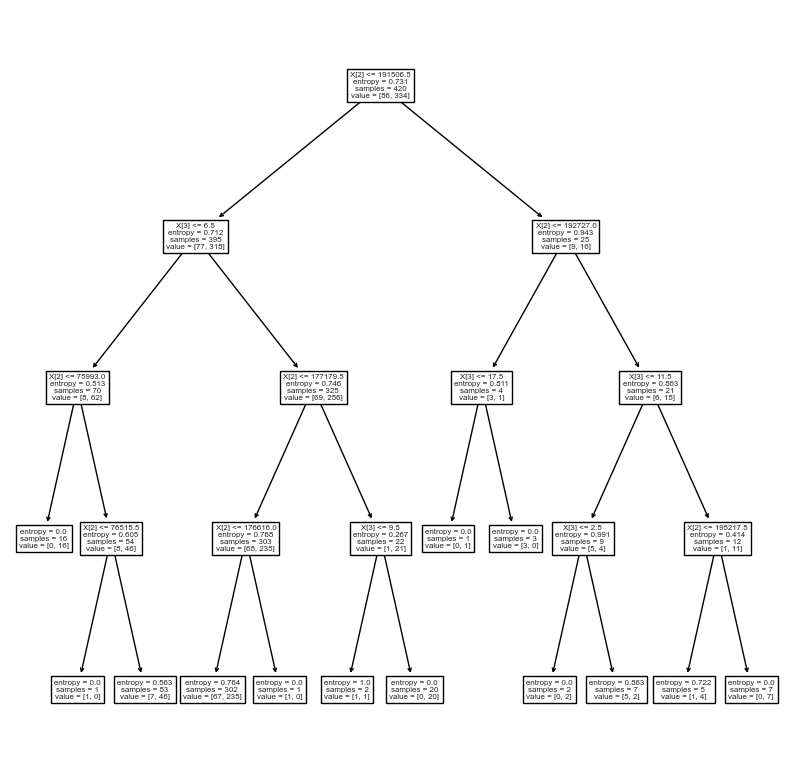

In [104]:
plt.figure(figsize=(10,10), dpi=100)
tree.plot_tree(model)

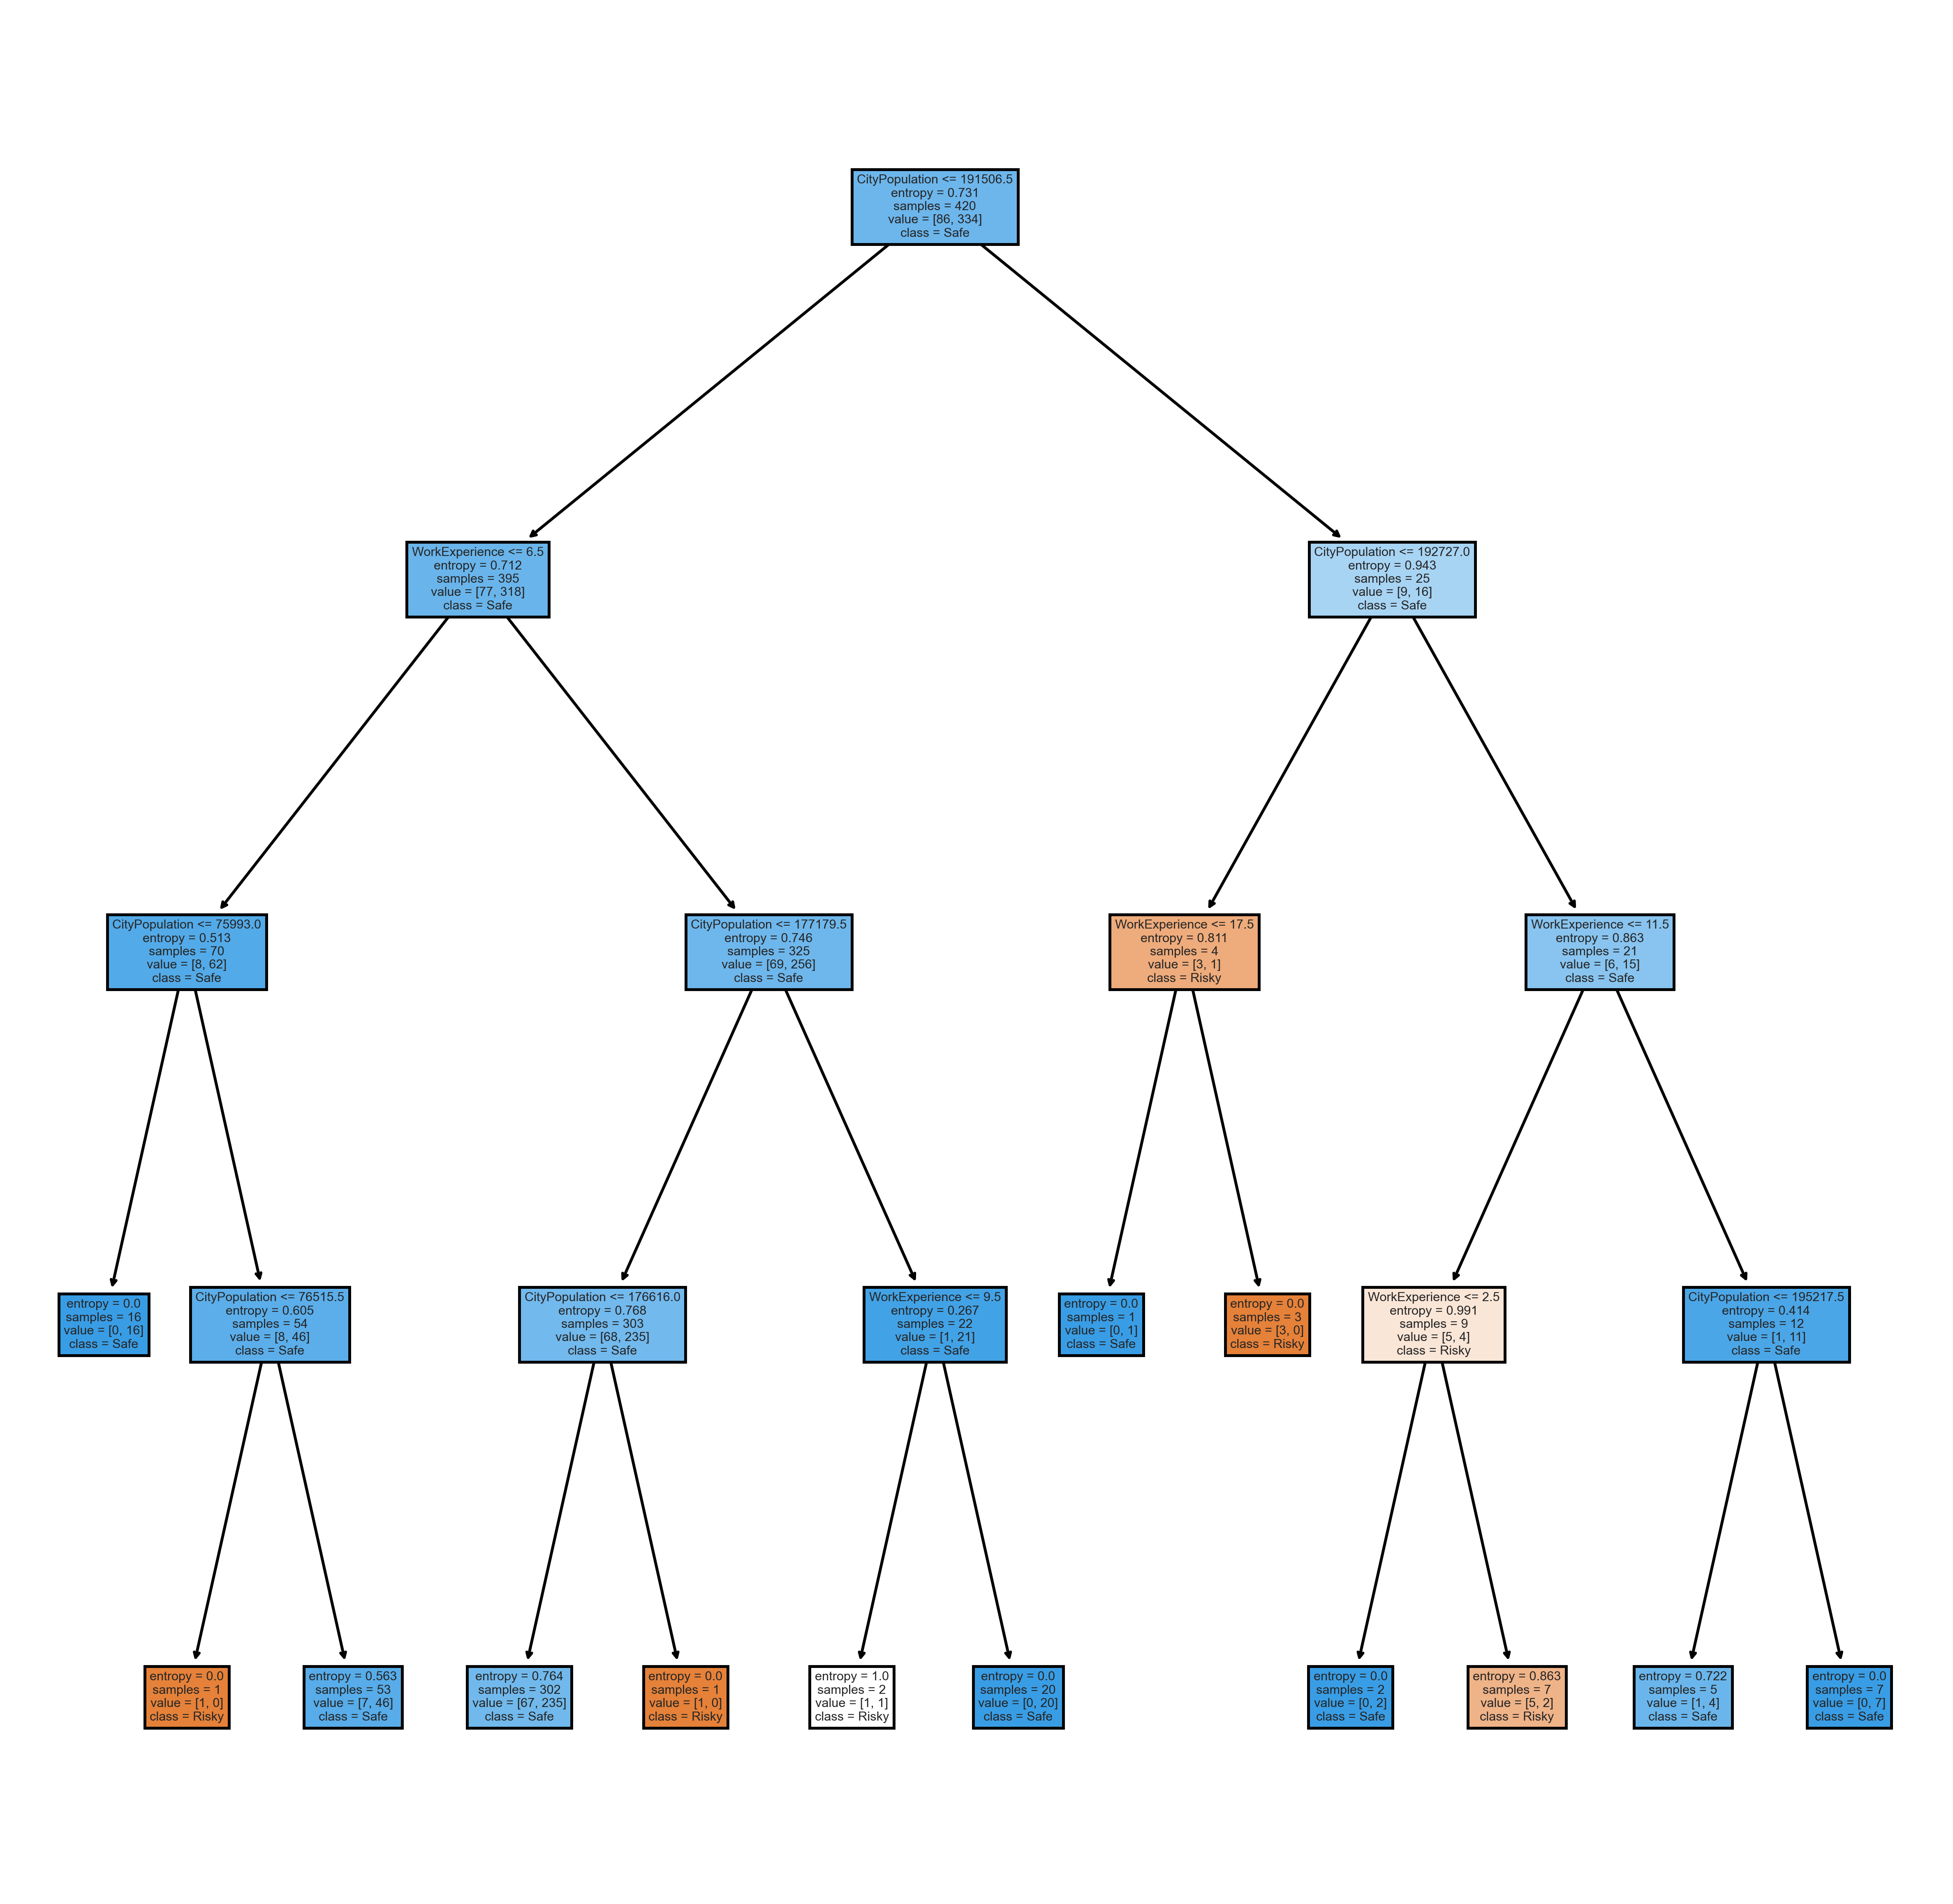

In [115]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
cn=['Risky','Safe']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [118]:
predictions = model.predict(x_test)

In [120]:
pd.crosstab(y_test,predictions)

col_0,Risky,Safe
status,,
Risky,0,38
Safe,2,140


### Hyper Parameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [110]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004197,7.471323e-04,0.002199,4.015446e-04,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.773810,0.714286,0.785714,0.761905,0.773810,0.761905,0.024972,4
1,0.003997,6.316558e-04,0.002599,7.997276e-04,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.785714,0.738095,0.690476,0.761905,0.761905,0.747619,0.032297,8
2,0.002998,1.784161e-07,0.001999,1.168008e-07,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.785714,0.750000,0.761905,0.750000,0.773810,0.764286,0.013883,3
3,0.000415,8.290291e-04,0.002000,3.999710e-03,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.773810,0.726190,0.738095,0.761905,0.773810,0.754762,0.019343,7
4,0.006000,4.898702e-03,0.000000,0.000000e+00,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.726190,0.678571,0.702381,0.726190,0.750000,0.716667,0.024281,11
5,0.002000,3.999710e-03,0.004000,4.898683e-03,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.738095,0.690476,0.702381,0.702381,0.738095,0.714286,0.019920,13
6,0.002000,3.999710e-03,0.002000,3.999710e-03,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.702381,0.678571,0.666667,0.690476,0.750000,0.697619,0.028769,14
7,0.004000,4.898975e-03,0.000000,0.000000e+00,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.773810,0.785714,0.761905,0.738095,0.785714,0.769048,0.017817,1
8,0.002000,3.999710e-03,0.002000,3.999519e-03,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.773810,0.761905,0.750000,0.773810,0.785714,0.769048,0.012141,1
9,0.004000,4.898683e-03,0.002000,3.999710e-03,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.761905,0.726190,0.761905,0.773810,0.773810,0.759524,0.017496,5


In [108]:
results.sort_values(['mean_test_score'], ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.004000,4.898975e-03,0.000000,0.000000e+00,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.773810,0.785714,0.761905,0.738095,0.785714,0.769048,0.017817,1
8,0.002000,3.999710e-03,0.002000,3.999519e-03,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.773810,0.761905,0.750000,0.773810,0.785714,0.769048,0.012141,1
2,0.002998,1.784161e-07,0.001999,1.168008e-07,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.785714,0.750000,0.761905,0.750000,0.773810,0.764286,0.013883,3
0,0.004197,7.471323e-04,0.002199,4.015446e-04,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.773810,0.714286,0.785714,0.761905,0.773810,0.761905,0.024972,4
9,0.004000,4.898683e-03,0.002000,3.999710e-03,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.761905,0.726190,0.761905,0.773810,0.773810,0.759524,0.017496,5
